<h1>ACELERA DEV - DATA SCIENCE</h1> <h2>Finding lead companies with existing portfolios</h2>

**Imports and Settings**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder
from kmodes.kmodes import KModes
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_rows', 200)
sns.set(style="darkgrid")

In [3]:
market = pd.read_csv('estaticos_market.csv')
portfolio_1 = pd.read_csv('estaticos_portfolio1.csv')
portfolio_2 = pd.read_csv('estaticos_portfolio2.csv')
portfolio_3 = pd.read_csv('estaticos_portfolio3.csv')

**Auxiliary Functions**

In [4]:
#creates auxiliary dataframe
def create_aux_df(df):
    df_aux = pd.DataFrame({'dtypes': df.dtypes,
                          'missing': df.isna().sum(),
                          'size': df.shape[0],
                          'missing%': round(df.isna().sum()/df.shape[0]*100, 2),
                          'nunique': df.nunique()}, index = df.columns)
    return df_aux

**Dataframe Overview**

In [5]:
market.head()

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,...,43.738462,93.266667,19.166667,26.0,26.0,27.0,0.0,-3.703704,0.0,0
1,1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
market.shape

(462298, 182)

In [7]:
market_aux = create_aux_df(market)

In [8]:
market_aux

,dtypes,missing,size,missing%,nunique
Unnamed: 0,int64,0,462298,0.00,462298
id,object,0,462298,0.00,462298
fl_matriz,bool,0,462298,0.00,2
de_natureza_juridica,object,0,462298,0.00,67
sg_uf,object,0,462298,0.00,6
natureza_juridica_macro,object,0,462298,0.00,7
de_ramo,object,0,462298,0.00,33
setor,object,1927,462298,0.42,5
idade_empresa_anos,float64,0,462298,0.00,14198
idade_emp_cat,object,0,462298,0.00,6


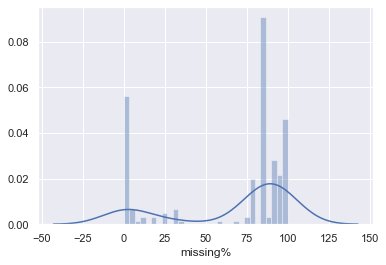

In [9]:
#missing% distribution
sns.distplot(market_aux['missing%'], bins = 30)

<h3>Handling missing values</h3>

There are several features with high *missing%* of NaN. We will try to model dropping features with *missing%* > 50%.

In [10]:
#backup df
market_copy = market.copy()

In [11]:
#dropping columns with > 50% NaN
features_miss_50 = market_aux[market_aux['missing%'] > 50].index
features_miss_50

Index(['vl_total_tancagem', 'vl_total_veiculos_antt',
       'vl_total_veiculos_leves', 'vl_total_veiculos_pesados', 'qt_art',
       'vl_total_tancagem_grupo', 'vl_total_veiculos_antt_grupo',
       'vl_potenc_cons_oleo_gas', 'de_indicador_telefone', 'vl_frota',
       ...
       'min_meses_servicos_all', 'media_meses_servicos', 'max_meses_servicos',
       'min_meses_servicos', 'qt_funcionarios', 'qt_funcionarios_12meses',
       'qt_funcionarios_24meses', 'tx_crescimento_12meses',
       'tx_crescimento_24meses', 'tx_rotatividade'],
      dtype='object', length=131)

* Some dropped features may be important to business, such as **vl_total_tancagem, qt_art, vl_frota, qt_coligados, qt_coligadas, total and qt_funcionarios**. We will try to model without them but we should keep them in mind going forward!

In [12]:
market_copy.drop(columns = features_miss_50, inplace = True)

In [13]:
#new aux df
market_copy_aux = create_aux_df(market_copy)

In [14]:
market_copy_aux

,dtypes,missing,size,missing%,nunique
Unnamed: 0,int64,0,462298,0.00,462298
id,object,0,462298,0.00,462298
fl_matriz,bool,0,462298,0.00,2
de_natureza_juridica,object,0,462298,0.00,67
sg_uf,object,0,462298,0.00,6
natureza_juridica_macro,object,0,462298,0.00,7
de_ramo,object,0,462298,0.00,33
setor,object,1927,462298,0.42,5
idade_empresa_anos,float64,0,462298,0.00,14198
idade_emp_cat,object,0,462298,0.00,6


<h3>Imputing missing values</h3>

Let's visualize some of features and see how they behave. 

In [15]:
#creating dataframes for portfolios
port1 = market_copy[market_copy['id'].isin(portfolio_1['id'].values)].copy()
port2 = market_copy[market_copy['id'].isin(portfolio_2['id'].values)].copy()
port3 = market_copy[market_copy['id'].isin(portfolio_3['id'].values)].copy()

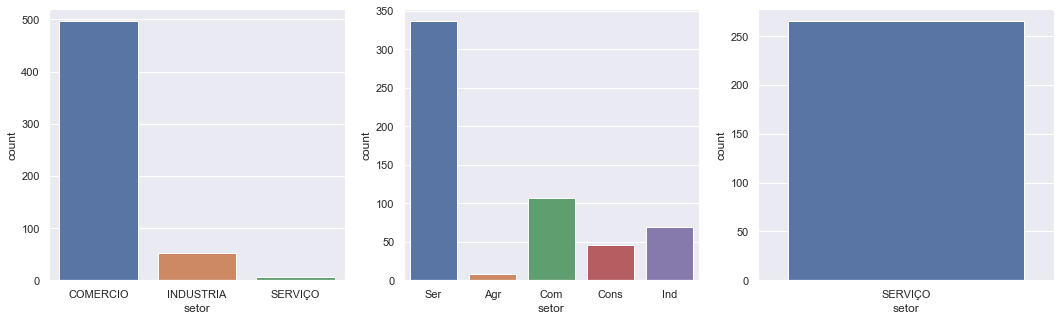

In [16]:
#'setor'
fig, ax = plt.subplots(1,3, figsize = (18,5))
sns.countplot(port1.setor, ax=ax[0])
sns.countplot(port2.setor, ax=ax[1])
sns.countplot(port3.setor, ax=ax[2])
ax[1].set_xticklabels(['Ser', 'Agr', 'Com', 'Cons', 'Ind' ])
plt.show()

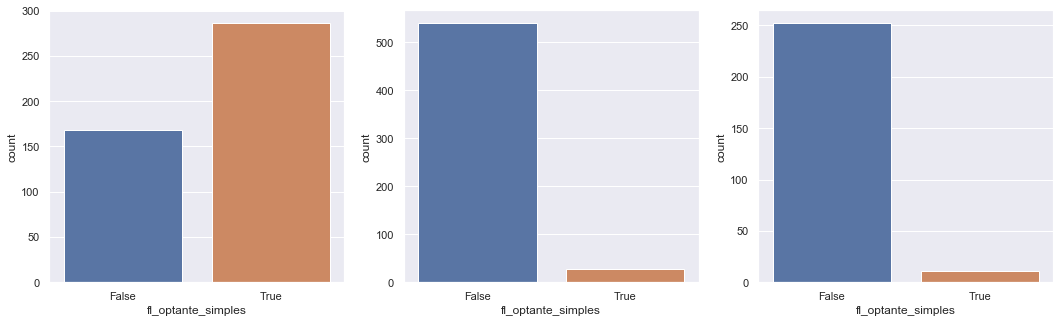

In [17]:
#f1_optante_simples
fig, ax = plt.subplots(1,3, figsize = (18,5))
sns.countplot(port1.fl_optante_simples, ax=ax[0])
sns.countplot(port2.fl_optante_simples, ax=ax[1])
sns.countplot(port3.fl_optante_simples, ax=ax[2])

In [18]:
#numerical features
market_copy[['qt_socios','nu_meses_rescencia', 'vl_faturamento_estimado_aux']].describe()

,qt_socios,nu_meses_rescencia,vl_faturamento_estimado_aux
count,347207.000000,417022.000000,4.347850e+05
mean,1.496326,25.007247,8.020911e+05
std,3.276626,9.679799,3.099979e+07
min,1.000000,0.000000,0.000000e+00
25%,1.000000,22.000000,1.648512e+05
50%,1.000000,23.000000,2.100000e+05
75%,2.000000,25.000000,2.100000e+05
max,246.000000,66.000000,1.454662e+10


In [19]:
market_copy['de_saude_rescencia'].value_counts()

ACIMA DE 1 ANO    378896
ATE 1 ANO          38101
SEM INFORMACAO     30425
ATE 3 MESES           13
ATE 6 MESES           12
Name: de_saude_rescencia, dtype: int64

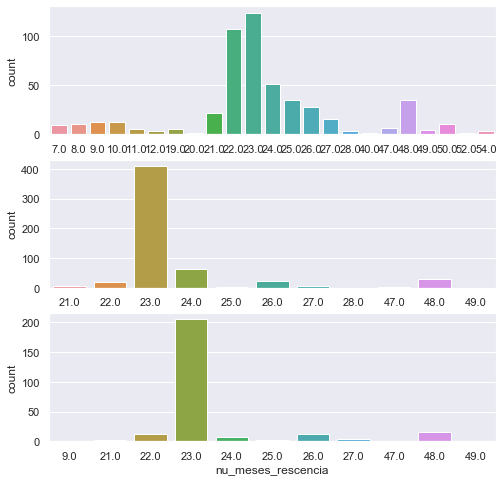

In [20]:
#'nu_meses_rescencia'
fig, ax = plt.subplots(3,1, figsize = (8,8))
sns.countplot(port1['nu_meses_rescencia'], ax=ax[0])
sns.countplot(port2['nu_meses_rescencia'], ax=ax[1])
sns.countplot(port3['nu_meses_rescencia'], ax=ax[2])

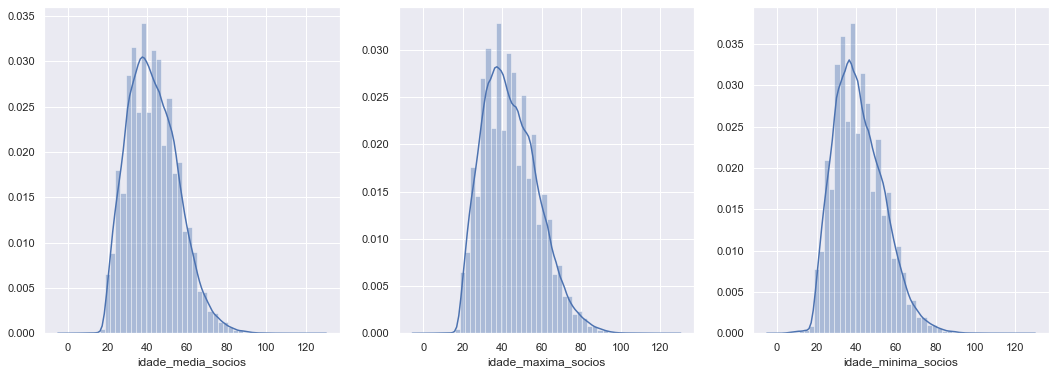

In [21]:
fig, ax = plt.subplots(1,3, figsize = (18,6))
sns.distplot(market['idade_media_socios'], ax=ax[0])
sns.distplot(market['idade_maxima_socios'], ax=ax[1])
sns.distplot(market['idade_minima_socios'], ax=ax[2])

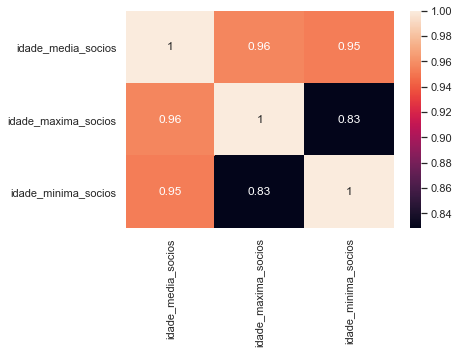

In [22]:
sns.heatmap(market[['idade_media_socios', 'idade_maxima_socios', 'idade_minima_socios']].corr(), annot = True)

<h4>Similar analysis was made to all features with missing% > 0. So, how are we filling our missing values?</h4>

* **setor** - "desconhecido"
* **nm_divisao** and **nm_segmento** - "desconhecido"
* **fl_spa** , **fl_antt** and **fl_veiculo** - False
* **fl_optante_simples** - 18% missing with ~50% True, 50% False -> "desconhecido"
* **vl_total_veiculos_pesados_grupo** and **vl_total_veiculos_leves_grupo** - 0 (mode)
* **fl_optante_simei** - 18% missing with ~25% True, ~75% False -> "desconhecido"
* **sg_uf_matriz** and **de_saude_tributaria** - "desconhecido"
* **de_saude_rescencia** - "SEM INFORMACAO"
* **nu_meses_rescencia** - 23 (mode)
* **de_nivel_atividade** - "desconhecido"
* **fl_simples_irregular** - False
* **empsetorcensitariofaixarendapopulacao** - mode (1549.1)
* **nm_meso_regiao** and **nm_micro_regiao** - "desconhecido"
* **fl_passivel_iss** - 0.42% missing with ~57% True, ~43%  False - "desconhecido"
* **qt_socios, qt_socios_pf e qt_socios_pj** - mode 
* **idade_media_socios**, **idade_maxima_socios** and **idade_minima_socios** - mean, drop
* **qt_socios_st_regular**, **de_faixa_faturamento_estimado** and **de_faixa_faturamento_estimado_grupo** - mode 
* **vl_faturamento_estimado_aux** and **vl_faturamento_estimado_grupo_aux** - mode

In [23]:
#features to be filled
fillna_desconhecido = ['setor', 'nm_divisao', 'nm_segmento', 'fl_optante_simples', 'fl_optante_simei', 'sg_uf_matriz',
                         'de_saude_tributaria', 'de_nivel_atividade', 'nm_meso_regiao', 'nm_micro_regiao', 'fl_passivel_iss']

fillna_mode = ['vl_total_veiculos_pesados_grupo', 'vl_total_veiculos_leves_grupo', 'nu_meses_rescencia', 
                'empsetorcensitariofaixarendapopulacao', 'qt_socios', 'qt_socios_pf', 'qt_socios_pj', 'qt_socios_st_regular', 
                'de_faixa_faturamento_estimado', 'de_faixa_faturamento_estimado_grupo', 'vl_faturamento_estimado_aux', 
                'vl_faturamento_estimado_grupo_aux']

fillna_mean = ['idade_media_socios', 'idade_maxima_socios', 'idade_minima_socios']

fillna_false = ['fl_spa', 'fl_antt', 'fl_veiculo', 'fl_simples_irregular']

In [24]:
market_fill = market_copy.copy()

In [25]:
#filling
market_fill[fillna_desconhecido] = market_fill[fillna_desconhecido].fillna('desconhecido')
market_fill[fillna_mode] = market_fill[fillna_mode].fillna(market[fillna_mode].mode().iloc[0])
market_fill[fillna_mean] = market_fill[fillna_mean].fillna(market[fillna_mean].mean())
market_fill[fillna_false] = market_fill[fillna_false].fillna(False)
market_fill['de_saude_rescencia'] = market_fill['de_saude_rescencia'].fillna('SEM INFORMACAO')

In [26]:
market_fill.drop(columns = ['Unnamed: 0', 'idade_maxima_socios', 'idade_minima_socios'], inplace = True)

In [27]:
market_fill_aux = create_aux_df(market_fill)

In [28]:
market_fill_aux

,dtypes,missing,size,missing%,nunique
id,object,0,462298,0.0,462298
fl_matriz,bool,0,462298,0.0,2
de_natureza_juridica,object,0,462298,0.0,67
sg_uf,object,0,462298,0.0,6
natureza_juridica_macro,object,0,462298,0.0,7
de_ramo,object,0,462298,0.0,33
setor,object,0,462298,0.0,6
idade_empresa_anos,float64,0,462298,0.0,14198
idade_emp_cat,object,0,462298,0.0,6
fl_me,bool,0,462298,0.0,2


<h3>1st model try: Clustering??</h3>

In [29]:
#updating portfolios with filled data
port1_f = market_fill[market_fill['id'].isin(portfolio_1['id'].values)].copy()
port2_f = market_fill[market_fill['id'].isin(portfolio_2['id'].values)].copy()
port3_f = market_fill[market_fill['id'].isin(portfolio_3['id'].values)].copy()

In [30]:
#grouping features by dtype
categorical_features = list(market_fill.select_dtypes(include='object').columns)
numerical_features = list(market_fill.select_dtypes(include=['int64','float64']).columns)
boolean_features = list(market_fill.select_dtypes(include='bool').columns)

In [31]:
#features for Kmodes clustering
kmodes_features = [col for col in categorical_features if col not in ['id','dt_situacao', 'fl_optante_simples',
                                                                      'fl_optante_simei', 'fl_passivel_iss']]
kmodes_features

['de_natureza_juridica',
 'sg_uf',
 'natureza_juridica_macro',
 'de_ramo',
 'setor',
 'idade_emp_cat',
 'fl_rm',
 'nm_divisao',
 'nm_segmento',
 'sg_uf_matriz',
 'de_saude_tributaria',
 'de_saude_rescencia',
 'de_nivel_atividade',
 'nm_meso_regiao',
 'nm_micro_regiao',
 'de_faixa_faturamento_estimado',
 'de_faixa_faturamento_estimado_grupo']

In [32]:
#label encoding
market_k_enc = market_fill[kmodes_features].apply(LabelEncoder().fit_transform)
market_k_enc.insert(0, 'id', market_fill['id'])

In [33]:
market_k_enc.head()

,id,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,fl_rm,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,60,4,2,11,2,1,1,32,10,19,4,0,0,6,48,2,2
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,17,3,5,21,4,0,1,3,3,16,2,1,1,4,69,10,10
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,17,1,5,32,4,3,1,86,20,2,0,0,2,2,43,1,1
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,17,1,5,25,4,3,1,74,17,2,0,0,2,2,43,10,10
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,17,4,5,27,4,0,1,77,8,19,4,0,0,6,48,10,10


In [34]:
#getting portfolios
port1_k_enc = market_k_enc[market_k_enc['id'].isin(portfolio_1['id'].values)].copy()
port2_k_enc = market_k_enc[market_k_enc['id'].isin(portfolio_2['id'].values)].copy()
port3_k_enc = market_k_enc[market_k_enc['id'].isin(portfolio_3['id'].values)].copy()

In [35]:
#creating train and test dfs
port1_train, port1_test = train_test_split(port1_k_enc, test_size=0.3, random_state=19, shuffle=True)
port2_train, port2_test = train_test_split(port2_k_enc, test_size=0.3, random_state=19, shuffle=True)
port3_train, port3_test = train_test_split(port3_k_enc, test_size=0.3, random_state=19, shuffle=True)

In [36]:
#creating a sample for kmodes
market_k_enc_sample = market_k_enc.sample(10000, random_state = 19) 
market_k_enc_sample.head()

,id,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,fl_rm,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
342250,faf861717ced3c36e13d2d3e22b13e46b9721ea8ba2d4d...,0,4,3,25,4,5,1,14,17,19,3,0,2,6,48,7,7
170799,e4b5acd5918b2330fd1df42d320f0ed24e0c8a05d37c3b...,17,5,5,29,3,5,0,54,13,20,3,0,2,19,73,10,10
97038,d1da8c80f66575f0f38ebf59119910f7d6c8a5203c03c0...,17,3,5,3,1,3,0,28,9,16,4,0,2,4,16,1,1
157576,af97b1e42e18553cb3a25893d259b6fda6e0b99278dc66...,60,4,2,5,1,1,0,30,9,19,4,0,0,11,47,3,5
63967,ae407141b52452569a8786f02970ee171515ab1b233430...,17,4,5,5,1,4,0,30,9,19,6,4,4,0,1,11,10


In [37]:
#elbow method for K 
costs = []
for k in range(1,6,1):
    km = KModes(n_clusters = k, init='Huang', n_init=5, verbose = 0)
    km.fit_predict(market_k_enc_sample[kmodes_features])
    costs.append(km.cost_)

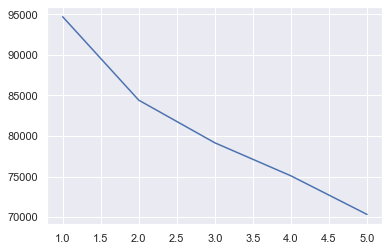

In [38]:
y = np.array([i for i in range(1,6,1)])
plt.plot(y,costs)

In [39]:
km = KModes(n_clusters = 4, init='Huang', n_init=5, verbose = 0)
clusters = km.fit(market_k_enc_sample[kmodes_features])

In [40]:
predict = clusters.predict(port1_train[kmodes_features])

In [41]:
pd.Series(predict).value_counts()

0    194
2     93
3     78
1     23
dtype: int64

**Maybe clustering is not the best way!** It will either take a lot of time to process representative clusters for the full market or it may be too generic, with low K values!

<h3>2nd try: K-Nearest Neighbors (KNN)</h3>

In [42]:
#updating features - booleans did not work well
knn_features = kmodes_features
for feat in numerical_features:
    knn_features.append(feat)
knn_features

['de_natureza_juridica',
 'sg_uf',
 'natureza_juridica_macro',
 'de_ramo',
 'setor',
 'idade_emp_cat',
 'fl_rm',
 'nm_divisao',
 'nm_segmento',
 'sg_uf_matriz',
 'de_saude_tributaria',
 'de_saude_rescencia',
 'de_nivel_atividade',
 'nm_meso_regiao',
 'nm_micro_regiao',
 'de_faixa_faturamento_estimado',
 'de_faixa_faturamento_estimado_grupo',
 'idade_empresa_anos',
 'vl_total_veiculos_pesados_grupo',
 'vl_total_veiculos_leves_grupo',
 'nu_meses_rescencia',
 'empsetorcensitariofaixarendapopulacao',
 'qt_socios',
 'qt_socios_pf',
 'qt_socios_pj',
 'idade_media_socios',
 'qt_socios_st_regular',
 'vl_faturamento_estimado_aux',
 'vl_faturamento_estimado_grupo_aux',
 'qt_filiais']

In [44]:
market_k_enc = market_fill[knn_features].apply(LabelEncoder().fit_transform)
market_k_enc.insert(0, 'id', market_fill['id'])

In [45]:
#getting new portfolio dfs
port1_k_enc = market_k_enc[market_k_enc['id'].isin(portfolio_1['id'].values)].copy()
port2_k_enc = market_k_enc[market_k_enc['id'].isin(portfolio_2['id'].values)].copy()
port3_k_enc = market_k_enc[market_k_enc['id'].isin(portfolio_3['id'].values)].copy()

#recreating train and test dfs
port1_train, port1_test = train_test_split(port1_k_enc, test_size=0.3, random_state=19, shuffle=True)
port2_train, port2_test = train_test_split(port2_k_enc, test_size=0.3, random_state=19, shuffle=True)
port3_train, port3_test = train_test_split(port3_k_enc, test_size=0.3, random_state=19, shuffle=True)

In [65]:
#model creating
n = 10
knn = NearestNeighbors(n_neighbors=n, metric = 'cosine') 
knn.fit(market_k_enc[knn_features])

NearestNeighbors(metric='cosine', n_neighbors=10)

We can **create functions** to easily make lead suggestions for different portfolios.

In [47]:
def get_suggestions(X_train, features):    
    #getting neighbors list for each row
    nlist = []
    for idx, row in X_train[features].iterrows():
        nlist.append(knn.kneighbors([row]))
    
    #separating suggestion indexes from distances
    suggestions = []
    for n in range(0,len(nlist)):
        suggestions.append(nlist[n][1][0][1:])
    
    #separating individual/exclusive indexes only
    final = []
    for point_sug in suggestions:
        for idx_sug in point_sug:
            #if index is not already appended and not part of train df
            if ((idx_sug not in final) and (idx_sug not in X_train.index)): final.append(idx_sug)
    
    #this is the suggestions df
    suggestions = market_k_enc.iloc[final]
        
    return suggestions

In [48]:
def evaluate_suggestions(X_test, df_suggestions):
    list_suggestions = list(df_suggestions['id'].values)
    list_test = list(X_test['id'].values)
     
    #evaluate recovering
    common=[]
    for sug in list_suggestions:
        for portid in list_test:
            if sug == portid: common.append(sug)
    print('{} suggestions were made.'.format(len(list_suggestions)))
    print('There are {} common values between our suggestions and our test dataframe, which has {} registers.'.format(len(common), len(X_test)))
    print('We recovered {:.2f}% of our test dataframe.'.format(len(common)/len(list_test)*100))

In [59]:
#portfolio 1
sug1 = get_suggestions(port1_train, knn_features)
evaluate_suggestions(port1_test, sug1)
print('K = {}'.format(n))

18407 suggestions were made.
There are 12 common values between our suggestions and our test dataframe, which has 167 registers.
We recovered 7.19% of our test dataframe.
K = 50


In [64]:
#portfolio 2
sug2 = get_suggestions(port2_train, knn_features)
evaluate_suggestions(port2_test, sug2)
print('K = {}'.format(n))

2056 suggestions were made.
There are 165 common values between our suggestions and our test dataframe, which has 170 registers.
We recovered 97.06% of our test dataframe.
K = 20


In [51]:
#portfolio 3
sug3 = get_suggestions(port3_train, knn_features)
evaluate_suggestions(port3_test, sug3)
print('K = {}'.format(n))

851 suggestions were made.
There are 49 common values between our suggestions and our test dataframe, which has 80 registers.
We recovered 61.25% of our test dataframe.
K = 10


Our model has **recovery values around 62% for portfolio 2 (863 suggestions) and 46% for portoflio 3 (480 suggestions) with K = 5**. If **K = 10**, **portfolio 2 recovery is around 85% (1436 suggestions) and portfolio 3 has a 61% recovery (851 suggestions)**.  Portfolio 1 did not presented a good recovery value for either values of K.

Optimal K may vary with portfolios, so test is reccomended. For example, K=20 for portfolio 2 recovers 97% of test data, with 2056 suggestions only.

After evaluation, we can apply the model for the full portfolios. **Portfolio 2 example**:

In [52]:
#final suggestions for portofolio 2
final_sug = get_suggestions(port2_k_enc, knn_features)
final_sug_aux = create_aux_df(final_sug)

In [53]:
final_sug.shape

(1484, 31)

In [54]:
final_sug.head()

,id,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,fl_rm,nm_divisao,nm_segmento,...,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,qt_socios_st_regular,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
115069,b0df4596e33949ceedc915cae233011f58c26d85b92a92...,31,3,0,24,4,3,0,11,18,...,21,12206,0,1,0,329,0,1296,4816,0
388297,4db3114a4f39babd5fcceb9a99b7f872ad579782cc249c...,60,1,2,20,4,1,1,82,5,...,23,15032,1,2,0,357,0,1847,6156,1
438681,cc687858a1fa67d4a43beccf3cc0b30f1519108d9df30d...,0,2,3,0,4,1,1,0,0,...,21,14928,0,1,0,612,0,1796,5985,5
51124,a74b4b5172bafa295c4d2ef1548da7ccfe3d5e3502d632...,52,0,3,24,4,3,0,11,18,...,21,14884,0,1,0,329,0,1857,6198,0
173076,180ad7c11800cfdd236a740e340202bfa4b371ae591944...,60,1,2,10,3,1,1,61,13,...,21,14358,3,3,1,717,2,1753,5866,0


In [55]:
final_sug_aux

,dtypes,missing,size,missing%,nunique
id,object,0,1484,0.0,1484
de_natureza_juridica,int32,0,1484,0.0,32
sg_uf,int32,0,1484,0.0,6
natureza_juridica_macro,int32,0,1484,0.0,4
de_ramo,int32,0,1484,0.0,30
setor,int32,0,1484,0.0,5
idade_emp_cat,int32,0,1484,0.0,5
fl_rm,int32,0,1484,0.0,2
nm_divisao,int32,0,1484,0.0,75
nm_segmento,int32,0,1484,0.0,19


**Comparing suggestions with portfolio**

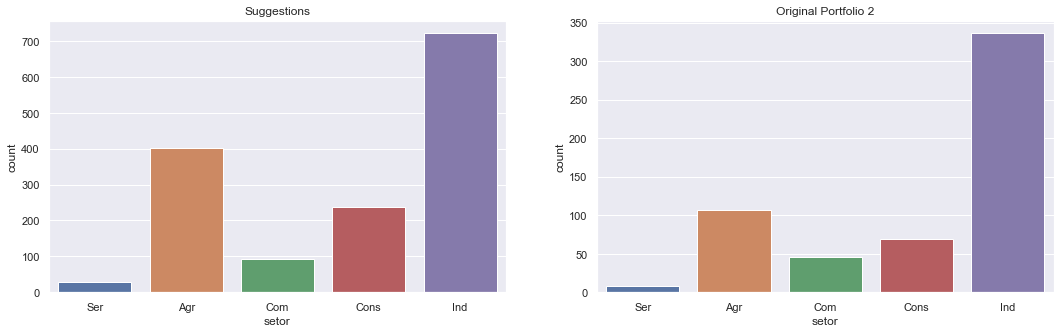

In [56]:
#'setor'
fig, ax = plt.subplots(1,2, figsize = (18,5))
sns.countplot(final_sug.setor, ax=ax[0])
sns.countplot(port2_k_enc.setor, ax=ax[1])
ax[0].set_xticklabels(['Ser', 'Agr', 'Com', 'Cons', 'Ind' ])
ax[1].set_xticklabels(['Ser', 'Agr', 'Com', 'Cons', 'Ind' ])
ax[0].set_title('Suggestions')
ax[1].set_title('Original Portfolio 2')
plt.show()

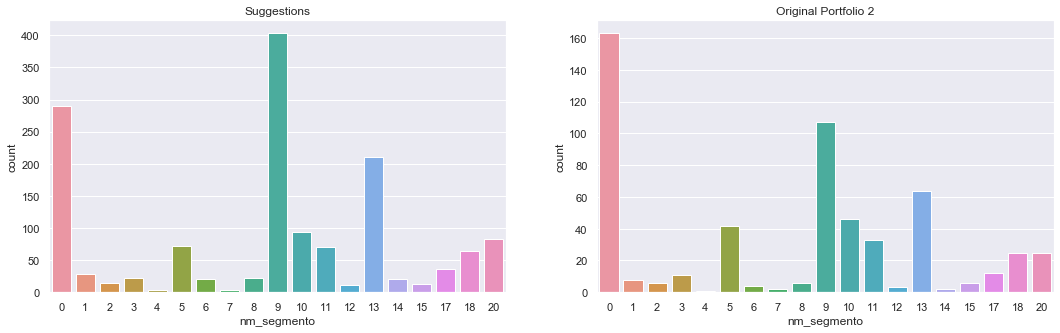

In [57]:
#'nm_segmento'
fig, ax = plt.subplots(1,2, figsize = (18,5))
sns.countplot(final_sug.nm_segmento, ax=ax[0])
sns.countplot(port2_k_enc.nm_segmento, ax=ax[1])

ax[0].set_title('Suggestions')
ax[1].set_title('Original Portfolio 2')
plt.show()

<h3>Discussion</h3>

* **Learning**
 * non-supervised learning
 * real world dataset


* **Things that I feel comfortable with**
 * understanding the algorithms
 * defining functions, clean code


* **Things that I need to improve** 
 * feature engineering (PCA)
 * data visualization


* **Difficulties**
 * number of features - extensive preprocessing
 * machine capacity
 * clustering -> KNN


* **To improve the model**
 * Explore numerical features
 * Ensemble different algorithms (kmeans?)
     * **lower K, lower suggestions**
 * Use SHAP values to better explain model
     * Which features contributef the most?
 * Answer: *Why portfolio 1 is hard to model?*

**THANK YOU CODENATION!!**